In [0]:
import numpy
import matplotlib.pyplot as plt
import torch
import math

In [0]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [0]:
import torch.nn.functional as F

In [0]:
import torch.nn as nn

<p>In this notebook the following libraries have been used:</p>
<ul>
  <li> nn.functional</li>
  <li> nn.parameter </li>
  <li> nn.linear </li>
  <li> nn.sequential </li>
</ul>

</p> The advantage of using each of the above has been described in the following cells </p>


 <p><b>Note:</b> nn.functional provides built in functions to compute quantities like cross entropy (softmax, relu etc) so that we do not have to write a code to compute it </p>

<p><b>Note:</b> We use nn.Parameters() to create the layers. The advantage of this approach is that in fit() function we do not need to update each set of weights and biases separately but can update everything by using just a single for loop. Thus fit() function can be **coded** independent of the model

<p> <b>Note:</b> nn.Linear abstracts the entire process of declaring weights and biases separately and initialising the weights. Thus it makes model building very easy, by having just one line of code for each layer and doing everything else under the hood </p>

<p><b>Note:</b> nn.Sequential makes code more concise when compared to using nn.functional. Also forward pass is very easy to code, and can be implemented using only one line of code. </p>

https://stackoverflow.com/questions/53745454/are-there-any-computational-efficiency-differences-between-nn-functional-vs-nn

<h3> Data Generation </h3>

In [5]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


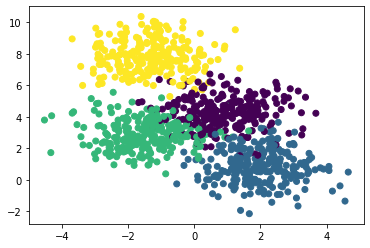

In [6]:
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


In [0]:
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))

In [0]:
#https://stackoverflow.com/questions/56741087/how-to-fix-runtimeerror-expected-object-of-scalar-type-float-but-got-scalar-typ/56741419
X_train = X_train.float()
Y_train = Y_train.long()



<h3> Using nn.Parameters </h3>

In [0]:
def accuracy(y_pred,y):
  pred = torch.argmax(y_pred, dim=1)
  return (pred == y).float().mean()

In [0]:
#Our neural network class inherits from nn.Module class
class TwoLayerNN(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1 = nn.Parameter(torch.randn(2,2)/math.sqrt(2))
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2,4)/math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))

  def forward(self,X):
    a1 = torch.matmul(X,self.weights1) + self.bias1
    h1 = torch.sigmoid(a1)
    #print(h1.shape, self.weights2.shape)
    a2 = torch.matmul(h1, self.weights2) + self.bias2
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2




In [0]:
def fit(lr=1,epochs = 5000):
  loss_arr=[]
  acc_arr= []
  for i in range(epochs):
    Y_pred = fn(X_train)
    loss = F.cross_entropy(Y_pred,Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(Y_pred,Y_train))
    loss.backward()

    with torch.no_grad():
      #print(fn.parameters())
      for param in fn.parameters():
        param -= lr * param.grad
      fn.zero_grad()

  plt.plot(loss_arr)
  plt.plot(acc_arr)
  plt.show()
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])
  print('Final accuracy',acc_arr[-1])
      



In [0]:
fn = TwoLayerNN()

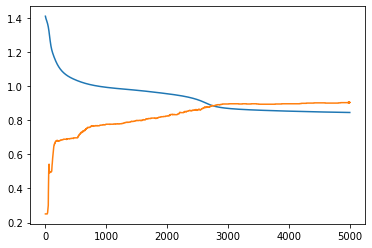

Loss before training 1.4111980199813843
Loss after training 0.8461545705795288
Final accuracy tensor(0.9053)


In [14]:
fit()

<h3> Using nn.Linear </h3>

In [0]:
class TwoLayerNN_v2(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2,2)
    self.lin2 = nn.Linear(2,4)

  def forward(self,X):
    a1 = self.lin1(X)
    h1 = a1.sigmoid()
    a2 = self.lin2(h1)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2
  

In [0]:
fn = TwoLayerNN_v2()

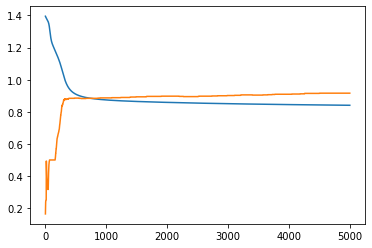

Loss before training 1.395160436630249
Loss after training 0.8406463861465454
Final accuracy tensor(0.9160)


In [17]:
fit()

<h3> Using nn.Sequential </h3>

In [0]:
class TwoLayerNN_v3(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2,2),
        nn.Sigmoid(),
        nn.Linear(2,4),
        nn.Softmax()

    )

  def forward(self,X):
    return self.net(X)

In [0]:
fn = TwoLayerNN_v3()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


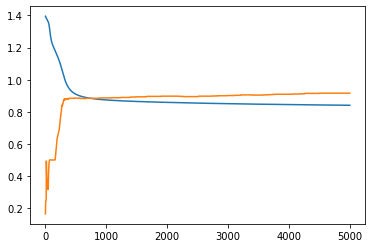

Loss before training 1.395160436630249
Loss after training 0.8406463861465454
Final accuracy tensor(0.9160)


In [20]:
fit()

<h3> Using nn.funtional </h3>

In [0]:
class TwoLayerNN_v4(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2,2)
    self.lin2 = nn.Linear(2,4)

  def forward(self,X):
    h1 = F.sigmoid(self.lin1(X))
    h2 = F.softmax(self.lin2(h1))
    return h2
  

In [0]:
import time

<h3> Running on GPU </h3>

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


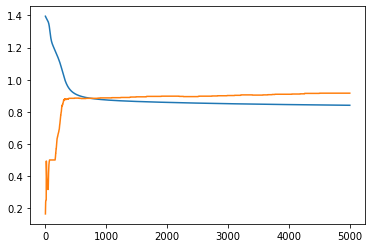

Loss before training 1.3951594829559326
Loss after training 0.8406463265419006
Final accuracy tensor(0.9160, device='cuda:0')
Final loss None
Time taken 7.975470304489136


In [23]:
device = torch.device("cuda:0")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = TwoLayerNN_v4()
fn.to(device)
tic = time.time()
print('Final loss', fit())
toc = time.time()
print('Time taken', toc - tic)